In [1]:
# data wrangling imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# stats imports
from scipy import stats

# my files
import acquire as acq
import prepare as prep
from env import host, user, password

np.random.seed(42)

In [ ]:
from pydataset import data

In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

    print the first 3 rows
    print the number of rows and columns (shape)
    print the column names
    print the data type of each column
    print the summary statistics for each of the numeric variables


In [ ]:
# a couple ways:
py_iris_df = data('iris')
iris_df = sns.load_dataset('iris')

In [ ]:
iris_df.head(3)

In [ ]:
iris_df.shape

In [ ]:
iris_df.columns.to_list()

In [ ]:
iris_df.info()

In [ ]:
iris_df.dtypes

In [ ]:
iris_df.describe()

In [ ]:
iris_df.describe().T

Read the data from this google sheet into a dataframe, df_google.

'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit?usp=sharing'

(Once you click on that, you get this one which is what you need:

https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357
)


    print the first 3 rows
    print the number of rows and columns
    print the column names
    print the data type of each column
    print the summary statistics for each of the numeric variables
    print the unique values for each of your categorical variables


In [ ]:
def get_csv_export_url(g_sheet_url):
    '''
    This function will
    - take in a string that is a url of a google sheet
      of the form "https://docs.google.com ... /edit#gid=12345..."
    - return a string that can be used with pd.read_csv
    '''
    csv_url = g_sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
    return csv_url

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [ ]:
csv_url = get_csv_export_url(sheet_url)
csv_url

In [ ]:
df_google = pd.read_csv(csv_url)

In [ ]:
df_google.head(3)

In [ ]:
df_google.shape

In [ ]:
df_google.info()

In [ ]:
df_google.columns.to_list()

In [ ]:
df_google.describe().T

In [ ]:
df_google.nunique() 

In [ ]:
df_google.Sex.value_counts()

In [ ]:
df_google.Ticket.value_counts()

In [ ]:
df_google.Cabin.value_counts()

In [ ]:
df_google.Embarked.value_counts()

In [ ]:
for col in df_google.columns.to_list():
    if df_google[col].dtype == 'object':
        print (f"{col} has {df_google[col].nunique()} unique values.")

In [ ]:
# another way. Thanks Cely!
df_google.select_dtypes('object').nunique()

Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

    assign the first 100 rows to a new dataframe, df_excel_sample
    print the number of rows of your original dataframe
    print the first 5 column names
    print the column names that have a data type of object
    compute the range for each of the numeric variables.



In [ ]:
# OTHER variables for passing to excel, sheet_name is a big one:
# pd.read_excel('LEA.xlsx', sheet_name="LEA Allocations", header= 1)

df_excel = pd.read_excel('train.xlsx')

In [ ]:
df_excel_sample = df_excel.head(100)

In [ ]:
df_excel.shape[0]

In [ ]:
df_excel_sample.shape[0]

In [ ]:
df_excel.columns[0:5]

In [ ]:
df_excel.columns[:5].to_list()

In [ ]:
df_excel.select_dtypes(include='object').columns

In [ ]:
df_excel.select_dtypes(exclude='object').columns

In [ ]:
df_excel.info()

In [ ]:
df_excel.select_dtypes(include=['int64','float64']).columns

In [ ]:
#### Must be an easier way to do this than 7 lines of code, but I'm going to skip it for now
## I came back and this is easier. Still needs some formatting, but I'm out of time.
for col in df_excel.select_dtypes(include=['int64','float64']).columns:
    print(f"{col}: max = {df_excel[col].max()}; min = {df_excel[col].min()}; range = {df_excel[col].max() - df_excel[col].min()}")

In [ ]:
# Also, Age and Fare are about the only ones where it makes sense to look at a range, so we could exclude the rest
titanic_stats = df_excel[['Age', 'Fare']].describe().T
titanic_stats['range'] = titanic_stats['max'] - titanic_stats['min']
titanic_stats


In [ ]:
print(f"PassengerId range = {df_excel.PassengerId.max() - df_excel.PassengerId.min()}")
print(f"Survived range = {df_excel.Survived.max() - df_excel.Survived.min()}")
print(f"Pclass range = {df_excel.Pclass.max() - df_excel.Pclass.min()}")
print(f"Age range = {df_excel.Age.max() - df_excel.Age.min()}")
print(f"SibSp range = {df_excel.SibSp.max() - df_excel.SibSp.min()}")
print(f"Parch range = {df_excel.Parch.max() - df_excel.Parch.min()}")
print(f"Fare range = {df_excel.Fare.max() - df_excel.Fare.min()}")


Make a new python module, acquire.py to hold the following data aquisition functions:

    Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

    Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

    Make a function named get_telco_data that returns the data from the telco_churn database in SQL. In your SQL, be sure to join contract_types, internet_service_types, payment_types tables with the customers table, so that the resulting dataframe contains all the contract, payment, and internet service options. Obtain your data from the Codeup Data Science Database.

    Once you've got your get_titanic_data, get_iris_data, and get_telco_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for the local filename of telco.csv, titanic.csv, or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.


In [ ]:
def get_sns_data(sns_source='iris'):
    '''
    This function will 
    - take in a string with the name of a seaborn dataset (default value is 'iris')
    - return a dataframe after reading the sns dataset
    '''
    iris_df = sns.load_dataset(sns_source)
    return iris_df

In [ ]:
def get_db_url(db_name, user=user, host=host, password=password):
    '''
    get_db_url accepts a database name, username, hostname, password 
    and returns a url connection string formatted to work with codeup's 
    sql database.
    Default values from env.py are provided for user, host, and password.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

In [ ]:
# generic function to get a sql pull into a dataframe
def get_mysql_data(sql_query, database):
    """
    This function will:
    - take in a sql query and a database (both strings)
    - create a connection url to mySQL database
    - return a df of the given query, connection_url combo
    """
    url = get_db_url(database)
    return pd.read_sql(sql_query, url)

In [ ]:
def get_titanic_data(sql_query="SELECT * FROM passengers"
                     , filename="titanic.csv"):
    """
    This function will:
    -input 2 strings: sql_query, filename 
        default query "SELECT * FROM passengers"
        default filename "titanic.csv"
    - check the current working directory for filename (csv) existence
      - return df from that filename if it exists
    - If csv doesn't exist:
      - create a df of the sql_query
      - write df to csv
      - return that df
    """
    if os.path.isfile(filename):
        df = pd.read_csv(filename)
        print("csv file found and read")
        return df
    else:
        url = get_db_url('titanic_db')
        df = pd.read_sql(sql_query, url)
        df.to_csv(filename, index=False)
        print ("csv file not found, data read from sql query, csv created")
        return df
    

In [ ]:
get_titanic_data()

In [ ]:
df = get_titanic_data()
df.head()

In [ ]:
new_df = get_titanic_data()
new_df.head()

In [ ]:
def get_iris_data(sql_query="SELECT * FROM species JOIN measurements USING (species_id)"
                 , filename="iris.csv"):
    """
    This function will:
    -input 2 strings: sql_query, filename 
        default query "SELECT * FROM passengers"
        default filename "iris.csv"
    - check the current directory for filename (csv) existence
      - return df from that filename if it exists
    - If csv doesn't exist:
      - create a df of the sql_query
      - write df to csv
      - return that df
    """
    if os.path.isfile(filename):
        df = pd.read_csv(filename)
        print ("csv file found and read")
        return df
    else:
        url = get_db_url('iris_db')
        df = pd.read_sql(sql_query, url)
        df.to_csv(filename, index=False)
        print ("csv file not found, data read from sql query, csv created")
        return df


In [ ]:
get_iris_data()

In [ ]:
df = get_iris_data()
df.head()

In [ ]:
df = get_iris_data()
df.head()

In [ ]:
def get_telco_data(sql_query= """
                        SELECT  customer_id, gender, senior_citizen
                            , partner, dependents, tenure, phone_service
                            , multiple_lines, customers.internet_service_type_id
                            , internet_service_types.internet_service_type
                            , online_security, online_backup
                            , device_protection, tech_support
                            , streaming_tv, streaming_movies
                            , customers.contract_type_id
                            , contract_types.contract_type
                            , paperless_billing, customers.payment_type_id
                            , payment_types.payment_type
                            , monthly_charges, total_charges
                            , churn
                        FROM customers
                        JOIN contract_types USING (contract_type_id)
                        JOIN internet_service_types USING (internet_service_type_id)
                        JOIN payment_types USING (payment_type_id)
                    """
                    , filename="telco.csv"):
    
    """
    This function will:
    -input 2 strings: sql_query, filename 
        default query "SELECT * FROM passengers"
        default filename "telco.csv"
    - check the current directory for filename (csv) existence
      - return df from that filename if it exists
    - If csv doesn't exist:
      - create a df of the sql_query
      - write df to csv
      - return that df
    """
    if os.path.isfile(filename):
        df = pd.read_csv(filename)
        print ("csv file found and read")
        return df
    else:
        url = get_db_url('telco_churn')
        df = pd.read_sql(sql_query, url)
        df.to_csv(filename, index=False)
        print ("csv file not found, data read from sql query, csv created")
        return df
     

In [ ]:
get_telco_data()

In [119]:
df = get_telco_data()
df.head()

In [ ]:
df = get_telco_data()
df.head()

In [ ]:
import acquire as acq


In [ ]:
newer_df = acq.get_iris_data()
newer_df

In [120]:
df = acq.get_telco_data()
df.head()

csv file found and read


,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,internet_service_type,...,streaming_tv,streaming_movies,contract_type_id,contract_type,paperless_billing,payment_type_id,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,DSL,...,Yes,No,2,One year,Yes,2,Mailed check,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,DSL,...,No,Yes,1,Month-to-month,No,2,Mailed check,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,Fiber optic,...,No,No,1,Month-to-month,Yes,1,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,Fiber optic,...,Yes,Yes,1,Month-to-month,Yes,1,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,Fiber optic,...,Yes,No,1,Month-to-month,Yes,2,Mailed check,83.9,267.4,Yes


In [ ]:
df = acq.get_titanic_data()
df.head()

## Exercises

The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

### Using the Iris Data:

    Use the function defined in acquire.py to load the iris data.

    Drop the species_id and measurement_id columns.

    Rename the species_name column to just species.

    Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

    Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.


In [ ]:
import acquire as acq

In [ ]:
df = acq.get_iris_data()

In [ ]:
df.head()

In [ ]:
df = df.drop(columns=['species_id', 'measurement_id'])
df.head()

In [ ]:
df = df.rename(columns={'species_name': 'species'})
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
dummy_df = pd.get_dummies(df[['species']], drop_first=True)
dummy_df.head()

In [ ]:
new_df = pd.concat([df, dummy_df], axis=1)
new_df.head()

In [ ]:
def prep_iris(df):
    """
    This function will
    - take in the iris_df
    - clean it up (remove useless columns, rename a column, and tack on some dummies columns for 'species')
    - returns cleaned up dataframe
    """
    df = df.drop(columns=['species_id', 'measurement_id'])
    df = df.rename(columns={'species_name': 'species'})
    dummy_df = pd.get_dummies(df[['species']], drop_first=True)
    new_df = pd.concat([df, dummy_df], axis=1)
    return new_df

In [ ]:
df = prep_iris(df)
df.head()


### Using the Titanic dataset

    Use the function defined in acquire.py to load the Titanic data.

    Drop any unnecessary, unhelpful, or duplicated columns.

    Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

    Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.


In [ ]:
df = acq.get_titanic_data()

In [ ]:
df.head()
df.shape
df.info()

In [ ]:
missing = df.isnull().sum()
missing[missing>0]

In [ ]:
df.nunique()

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df = df.drop(columns=['passenger_id', 'class', 'embark_town', 'deck', 'age'])
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
dummies_df = pd.get_dummies(df[['pclass', 'sex','embarked']], drop_first=True)
dummies_df.head()

In [ ]:
dummies_df.pclass.value_counts()

In [ ]:
dummies_df[['sex_male','embarked_Q','embarked_S']].value_counts()

In [ ]:
new_df = pd.concat([df, dummies_df], axis=1)
new_df.head()

In [ ]:
new_df.isnull().sum() # two null values in embarked. We will practice with imputer during the split

In [ ]:
def prep_titanic(df):
    """
    This function will
    - take in the titanic dataframe
    - clean it up (remove useless columns and tack on some dummies columns for 'pclass', 'sex', 'embarked')
    - returns cleaned up dataframe
    """
    df = df.drop(columns=['passenger_id', 'class', 'embark_town', 'deck', 'age'])
    dummies_df = pd.get_dummies(df[['pclass', 'sex','embarked']], drop_first=True)
    new_df = pd.concat([df, dummies_df], axis=1)
    return new_df

In [ ]:
df = acq.get_titanic_data()

In [ ]:
df = prep_titanic(df)
df.head()

### Using the Telco dataset

    Use the function defined in acquire.py to load the Telco data.

    Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

    Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

    Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.


In [ ]:
df = acq.get_telco_data()

In [ ]:
df.head()

In [ ]:
df.partner.value_counts()

In [ ]:
df = df.drop(columns=['customer_id', 'internet_service_type_id', 'contract_type_id', 'payment_type_id'])

In [ ]:
df.sample(10)

In [ ]:
# df = df.rename(columns={'senior_citizen': 'is_senior'
#                        ,'phone_service': 'phone_svc'
#                        ,'multiple_lines': 'mult_lines'
#                        ,'internet_service_type': 'intrnt_svc_type'
#                        ,'streaming_tv': 'strmg_tv'
#                        ,'streaming_movies': 'strmg_movies'
#                        ,'paperless_billing': 'paperless_bill'})
df.sample(5)

In [ ]:
# mask = df.total_charges == ' '
# mask.sum()
# df.loc[mask, 'total_charges'] = '0'
# df.total_charges = df.total_charges.astype(float)

In [ ]:
# Another way
df.total_charges = df.total_charges.str.replace(' ', '0').astype(float)
df.total_charges

In [ ]:
df.total_charges[df.total_charges == 0]

In [ ]:
df.head().T

In [ ]:
# Encode binary categorical variables into numeric values
df['gender_encoded'] = df.gender.map({'Male': 0, 'Female': 1})
df['partner_encoded'] = df.partner.map({'No': 0, 'Yes': 1})
df['dependendents_encoded'] = df.dependents.map({'No': 0, 'Yes': 1})
df['phone_service_encoded'] = df.phone_service.map({'No': 0, 'Yes': 1})
df['paperless_billing_encoded'] = df.paperless_billing.map({'No': 0, 'Yes': 1})
df['churn_encoded'] = df.churn.map({'No': 0, 'Yes': 1})

In [ ]:
#dummy_df = pd.get_dummies(df[['']])
dummy_df = pd.get_dummies(df[['mult_lines', 'intrnt_svc_type', 'online_security', 'online_backup'
                               ,'device_protection', 'tech_support', 'strmg_tv', 'strmg_movies'
                               ,'contract_type', 'payment_type']], drop_first=True)
dummy_df

In [ ]:
df = pd.concat([df, dummy_df], axis=1)
df.head()

In [ ]:
df.head().T

In [122]:
def prep_telco(df):
    """
    This function will
    - take in the telco_churn dataframe
    - clean it up (remove useless columns, rename some columns, and
      add encoded columns for categorical variables (columns) 
    - returns cleaned up (prepared) dataframe
    """
    df = df.drop(columns=['customer_id', 'internet_service_type_id', 'contract_type_id', 'payment_type_id'])
    df.total_charges = df.total_charges.str.replace(' ', '0').astype(float)
    df['gender_encoded'] = df.gender.map({'Male': 0, 'Female': 1})
    df['partner_encoded'] = df.partner.map({'No': 0, 'Yes': 1})
    df['dependendents_encoded'] = df.dependents.map({'No': 0, 'Yes': 1})
    df['phone_service_encoded'] = df.phone_service.map({'No': 0, 'Yes': 1})
    df['paperless_billing_encoded'] = df.paperless_billing.map({'No': 0, 'Yes': 1})
    df['churn_encoded'] = df.churn.map({'No': 0, 'Yes': 1})
    dummy_df = pd.get_dummies(df[['multiple_lines', 'internet_service_type', 'online_security', 'online_backup'
                               ,'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies'
                               ,'contract_type', 'payment_type']], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [ ]:
df = acq.get_telco_data()
df.head()

In [ ]:
df = prep.prep_telco(df)
df.head().T

In [ ]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True))
    print()

### Split your data

    Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

    Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

    Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

    Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def split_function(df, target_var):
    """
    This function will
    - take in a dataframe (df) and a string (target_var)
    - split the dataframe into 3 data frames: train (60%), validate (20%), test (20%)
    -   while stratifying on the target_var
    - And finally return the three dataframes in order: train, validate, test
    """
    train, test = train_test_split(df, random_state=42, test_size=.2, stratify=df[target_var])
    
    train, validate = train_test_split(train, random_state=42, test_size=.25, stratify=train[target_var])
    
    return train, validate, test

In [ ]:
train_telco_df, validate_telco_df, test_telco_df = split_function(df, 'churn')

In [ ]:
print(f'Prepared df: {df.shape}')
print()
print(f'Train: {train_telco_df.shape}')
print(f'Validate: {validate_telco_df.shape}')
print(f'Test: {test_telco_df.shape}')


In [ ]:
import acquire as acq
import prepare as prep

In [2]:
df = acq.get_iris_data()
df = prep.prep_iris(df)
train_iris, validate_iris, test_iris = prep.split_function(df, 'species')

csv file found and read
Prepared df: (150, 7)

Train: (90, 7)
Validate: (30, 7)
Test: (30, 7)


In [ ]:
df = acq.get_titanic_data()
df = prep.prep_titanic(df)
train_titanic, validate_titanic, test_titanic = prep.split_function(df, 'survived')

In [ ]:
df = acq.get_telco_data()
df = prep.prep_telco(df)
train_telco, validate_telco, test_telco = prep.split_function(df, 'churn')

# Explore Exercises
## Part 1 (iris)

Continue in your classification_exercises.ipynb notebook. As always, add, commit, and push your changes.

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

    Acquire, prepare & split your data.

    Univariate Stats

        For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

        For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

        Document takeaways & any actions.

    Bivariate Stats

        Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

        For each measurement type, compute the descriptive statistics for each species.

        For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

        Document takeaways & any actions.

    Multivariate Stats

        Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

        Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

        Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

        Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

        Document takeaways and any actions.


In [2]:
df = acq.get_iris_data()
df = prep.prep_iris(df)
train_iris, validate_iris, test_iris = prep.split_function(df, 'species')

csv file found and read
Prepared df: (150, 7)

Train: (90, 7)
Validate: (30, 7)
Test: (30, 7)


In [3]:
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


In [76]:
train_iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
124,virginica,6.7,3.3,5.7,2.1,0,1
40,setosa,5.0,3.5,1.3,0.3,0,0
54,versicolor,6.5,2.8,4.6,1.5,1,0
23,setosa,5.1,3.3,1.7,0.5,0,0
108,virginica,6.7,2.5,5.8,1.8,0,1


In [77]:
train_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 124 to 88
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   species             90 non-null     object 
 1   sepal_length        90 non-null     float64
 2   sepal_width         90 non-null     float64
 3   petal_length        90 non-null     float64
 4   petal_width         90 non-null     float64
 5   species_versicolor  90 non-null     uint8  
 6   species_virginica   90 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 4.4+ KB


In [78]:
train_iris.describe(include='all')

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
count,90,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN
top,virginica,NaN,NaN,NaN,NaN,NaN,NaN
freq,30,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.836667,3.013333,3.751111,1.197778,0.333333,0.333333
std,NaN,0.866149,0.416297,1.772083,0.761279,0.474045,0.474045
min,NaN,4.300000,2.000000,1.100000,0.100000,0.000000,0.000000
25%,NaN,5.100000,2.725000,1.600000,0.300000,0.000000,0.000000
50%,NaN,5.750000,3.000000,4.250000,1.300000,0.000000,0.000000
75%,NaN,6.400000,3.200000,5.100000,1.800000,1.000000,1.000000


### Hypothesize: How do the different measurements correlate with the species?
- sepal_length, sepal_width, petal_length, petal_width

### Visualize
- Attempting to comply with the instructions in the exercise under 'Univariate Stats'

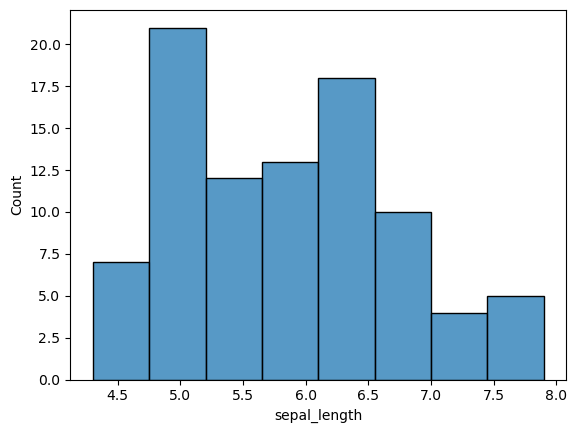

In [79]:
sns.histplot(data=train_iris.sepal_length)
plt.show()

In [97]:
# histograms aren't too useful when not broken out into species

cols = train_iris.columns
cols = cols[1:5]
cols = np.array(cols)
cols
cols = np.array(train_iris.columns[1:5])
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [81]:
s_array = train_iris.species.unique()
s_array

array(['virginica', 'setosa', 'versicolor'], dtype=object)

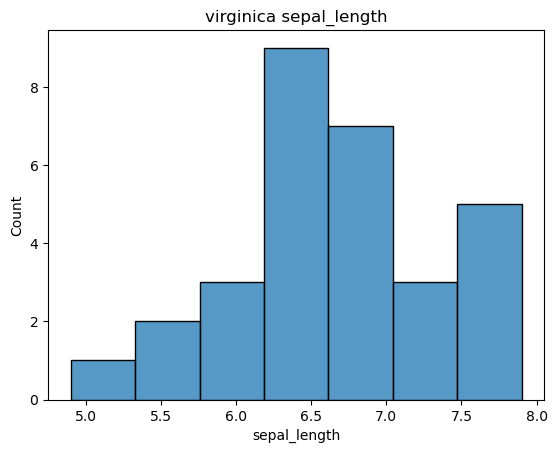

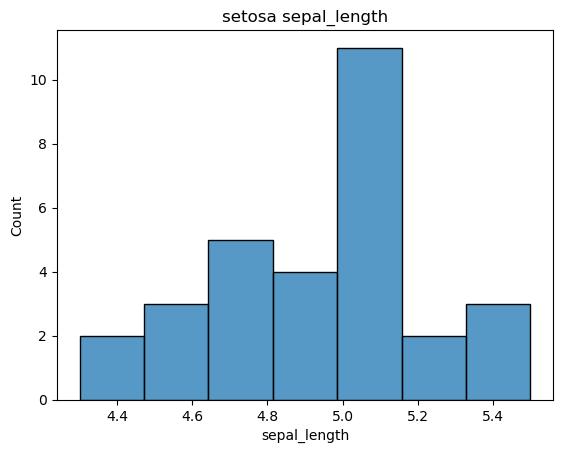

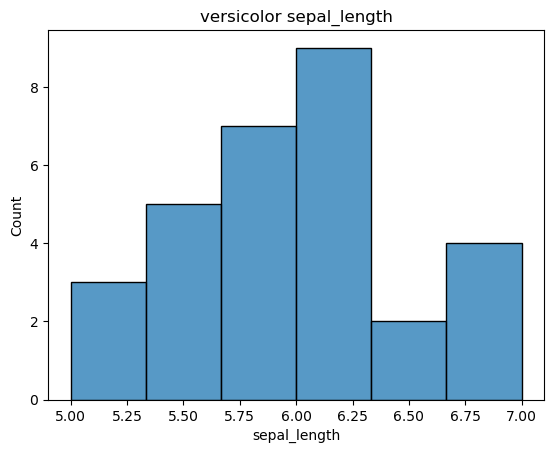

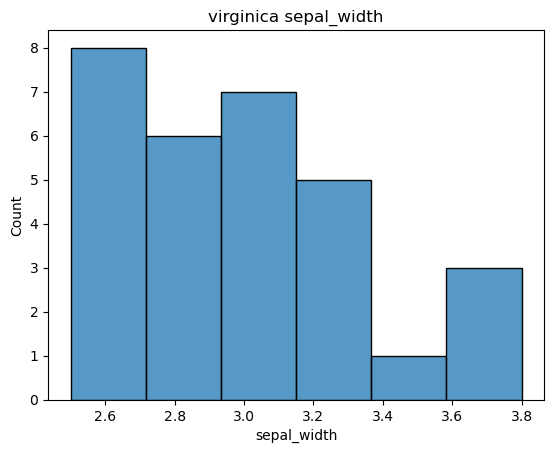

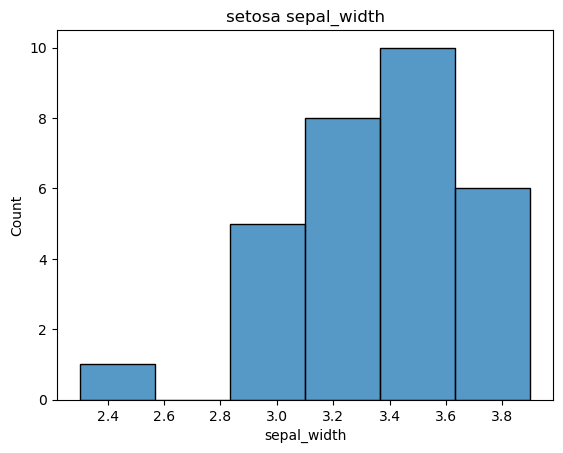

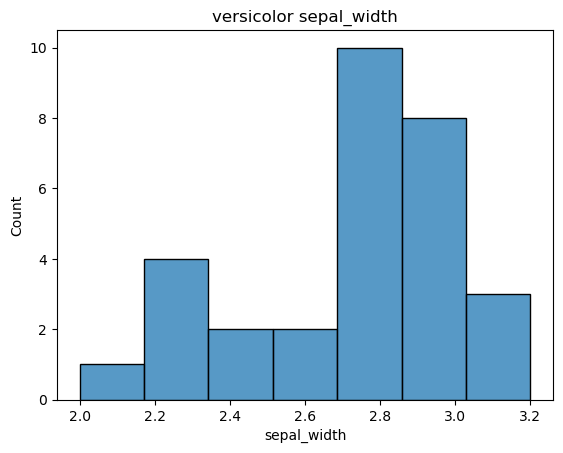

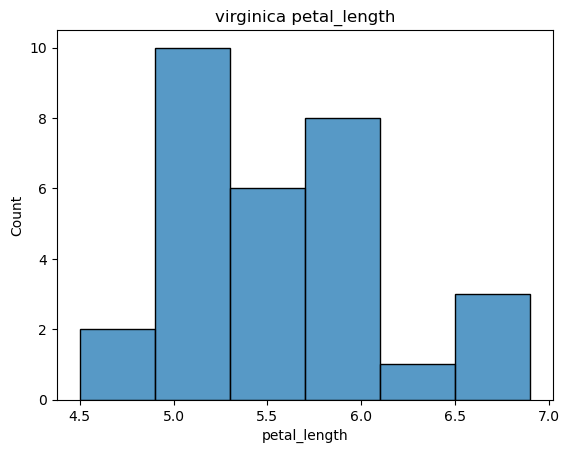

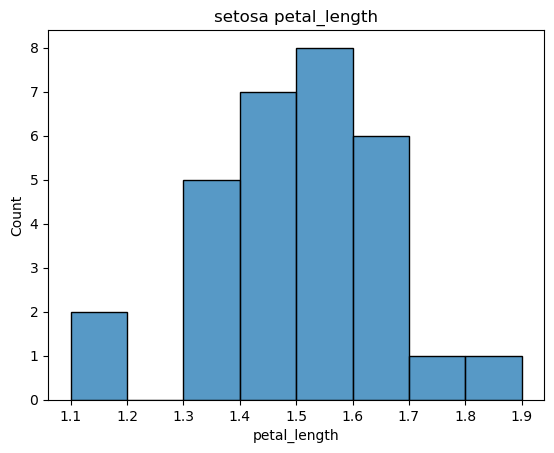

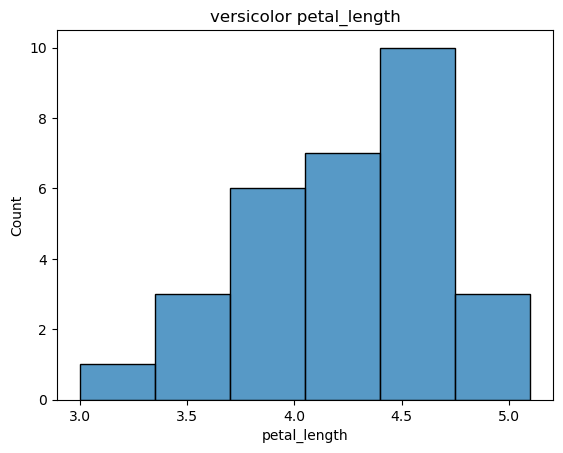

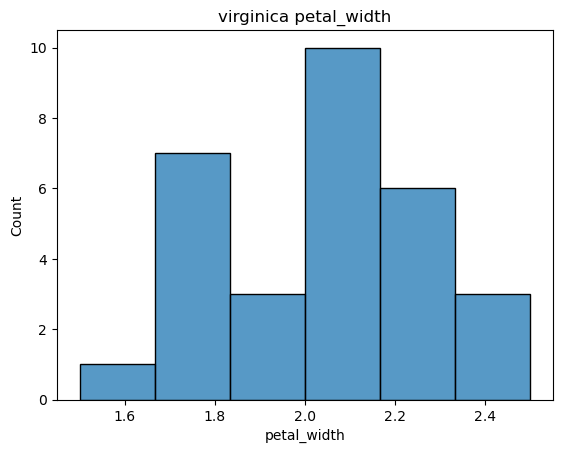

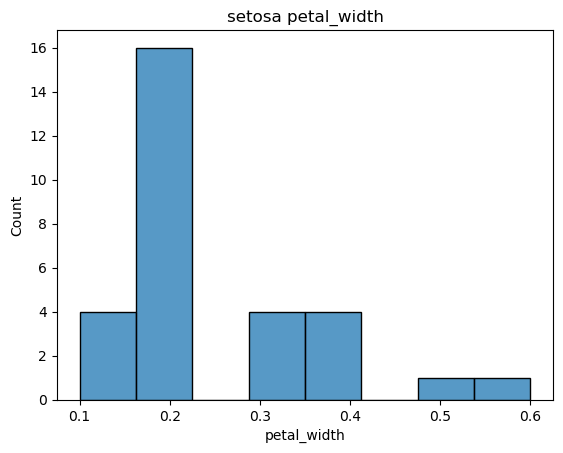

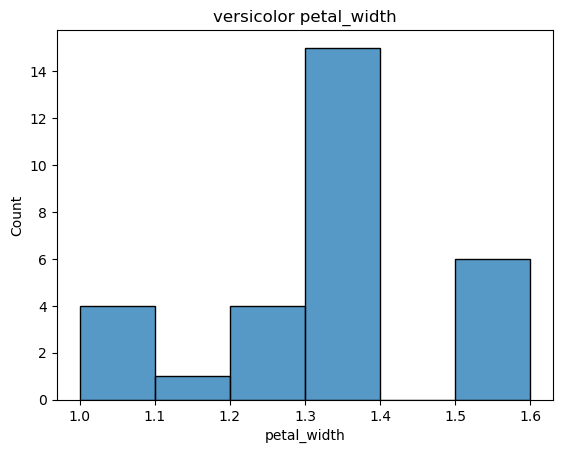

In [82]:
for col in cols:
    for s in s_array:
        sns.histplot(data=train_iris[train_iris.species == s][col])
        plt.title(s + ' ' + col)
        plt.show()

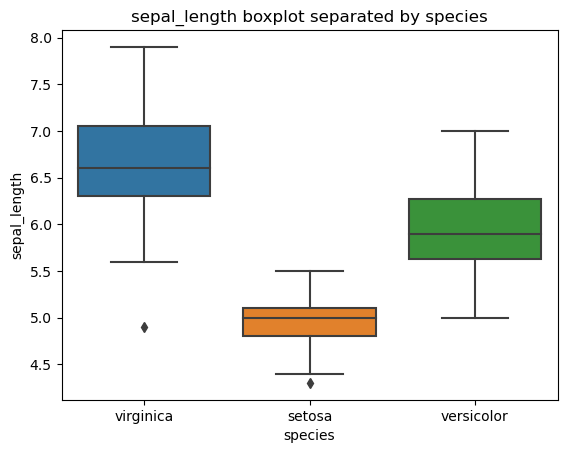

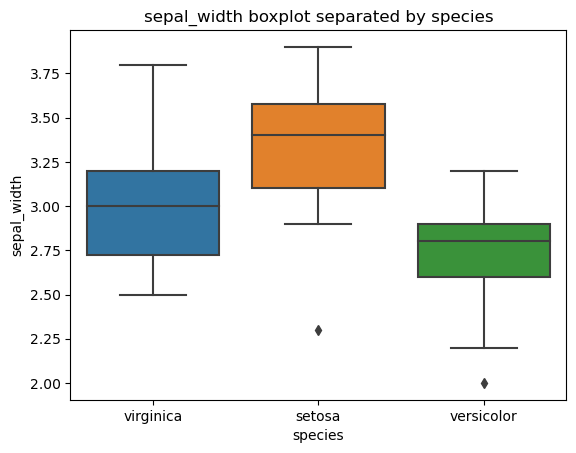

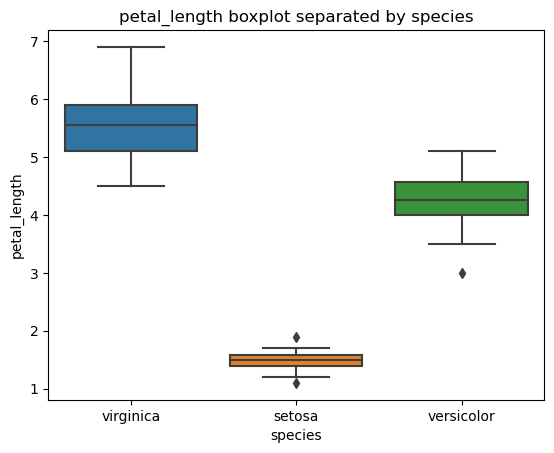

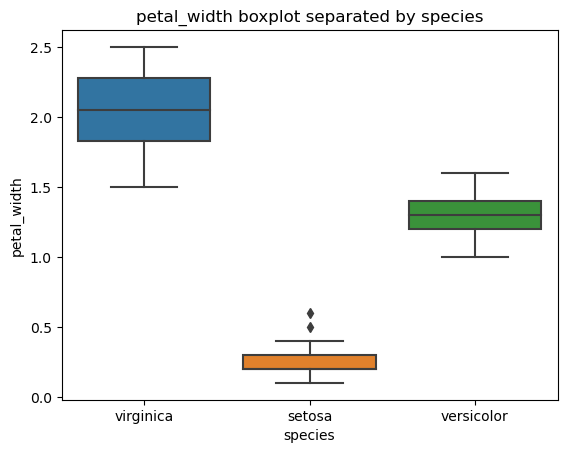

In [83]:
# The only value I see in the histogram plots is to show that none are normally distributed
# The one exception is petal_length. It's distributiion looked sorta, kinda normal.

# Histograms didn't really seem that useful. Let's try boxplots
for col in cols:
    sns.boxplot(data=train_iris, x='species', y=col)
    plt.title(col + ' boxplot separated by species')
    plt.show()

In [87]:
pd.crosstab(train_iris.species, train_iris.species, margins=True)

species,setosa,versicolor,virginica,All
species,,,,
setosa,30,0,0,30
versicolor,0,30,0,30
virginica,0,0,30,30
All,30,30,30,90


In [74]:
# I'm not exactly sure right now how to make a barplot of the frequency, but
# i know that there are 30 observations for each species in the train df. 
# I can visualize what that bar plot would look like.

### Document takeaways from Univariate visualization

- petal_length and petal_width appear to be good discriminators for choosing species
- I'm calling all distributions of measurements NOT normally distributed (petal_length was the only one that was close to normal)

### Next up: bivariate instructions


Bivariate Stats

    Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

    For each measurement type, compute the descriptive statistics for each species.

    For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

    Document takeaways & any actions.

In [98]:
cols = np.array(train_iris.columns[1:5])
s_array = train_iris.species.unique()

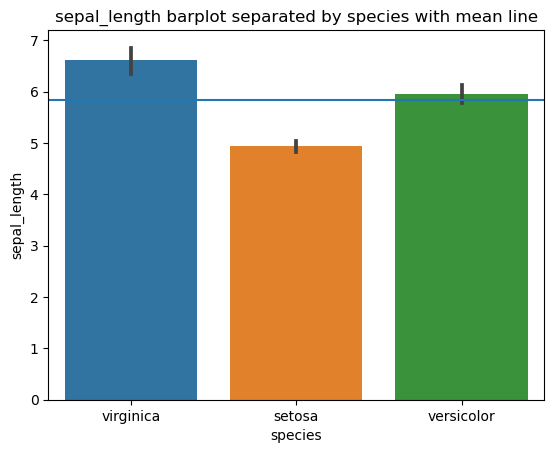

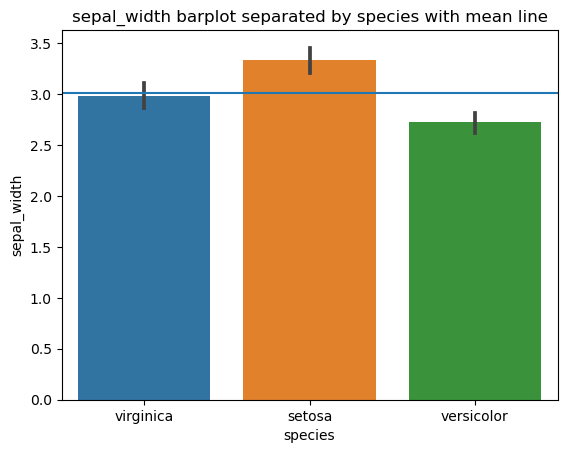

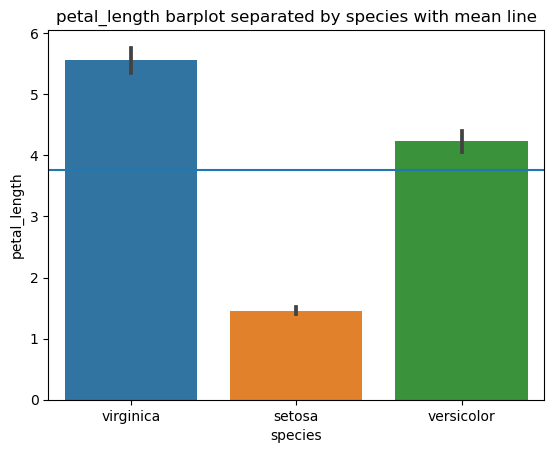

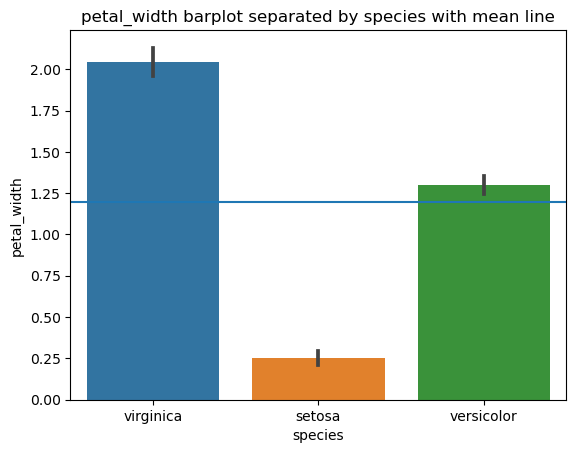

In [99]:
for col in cols:
    graph = sns.barplot(data=train_iris, x='species', y=col)
    graph.axhline(train_iris[col].mean())
    plt.title(col + ' barplot separated by species with mean line')
    plt.show()

In [102]:
for s in s_array:
    print(f'Descriptive statistics for {s}:')
    print(train_iris[train_iris.species == s].describe())
    print()

Descriptive statistics for virginica:
       sepal_length  sepal_width  petal_length  petal_width  \
count     30.000000    30.000000     30.000000    30.000000   
mean       6.610000     2.980000      5.553333     2.043333   
std        0.713104     0.356612      0.600995     0.240235   
min        4.900000     2.500000      4.500000     1.500000   
25%        6.300000     2.725000      5.100000     1.825000   
50%        6.600000     3.000000      5.550000     2.050000   
75%        7.050000     3.200000      5.900000     2.275000   
max        7.900000     3.800000      6.900000     2.500000   

       species_versicolor  species_virginica  
count                30.0               30.0  
mean                  0.0                1.0  
std                   0.0                0.0  
min                   0.0                1.0  
25%                   0.0                1.0  
50%                   0.0                1.0  
75%                   0.0                1.0  
max               

### Documentation from Bivariate Visualization:
- Both petal_length and petal_width allow us to pretty clearly separate setosa from the other two species; versicolor and virginica.
- sns.pairplot also showed comparing petal_length or petal_width to the other 3 variables (i.e. pl to pw/sl/sw or pw to pl/sl/sw) should be helpful in predicting species from these measurements

### Instructions continued:

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

### Analyze Phase

$H_0$ There is NO relatioship between species and each variable (petal_width, petal_length, sepal_width, sepal_length)

$H_a$ There IS a relationship

$alpha$ = .05

(Note: Four sets of hypotheses above)

In [104]:
virginica_train = train_iris[train_iris.species == 'virginica'].petal_width
versicolor_train = train_iris[train_iris.species == 'versicolor'].petal_width

t, p = stats.mannwhitneyu(virginica_train, versicolor_train)
t, p

(896.5, 3.456365946570801e-11)

### Summarize (petal_width):
- For petal_width, since p is < alpha, we can reject the $H_0$
- This suggest the $H_a$ that there is a relationship between petal_width and species.

In [105]:
virginica_train = train_iris[train_iris.species == 'virginica'].petal_length
versicolor_train = train_iris[train_iris.species == 'versicolor'].petal_length

t, p = stats.mannwhitneyu(virginica_train, versicolor_train)
t, p

(880.5, 1.9585341115233944e-10)

### Summarize (petal_length):
- For petal_length, since p is < alpha, we can reject the $H_0$
- This suggest the $H_a$ that there is a relationship between petal_length and species.

In [106]:
virginica_train = train_iris[train_iris.species == 'virginica'].sepal_length
versicolor_train = train_iris[train_iris.species == 'versicolor'].sepal_length

t, p = stats.mannwhitneyu(virginica_train, versicolor_train)
t, p

(704.5, 0.0001674717775521336)

### Summarize (sepal_length):
- For sepal_length, since p is < alpha, we can reject the $H_0$
- This suggest the $H_a$ that there is a relationship between sepal_length and species.

In [108]:
virginica_train = train_iris[train_iris.species == 'virginica'].sepal_width
versicolor_train = train_iris[train_iris.species == 'versicolor'].sepal_width

t, p = stats.mannwhitneyu(virginica_train, versicolor_train)
t, p

(616.0, 0.013739683116176602)

### Summarize (sepal_width):
- For sepal_width, since p is < alpha, we can reject the $H_0$
- This suggest the $H_a$ that there is a relationship between sepal_width and species.
- Of note, the p value is the highest (~.014) here, so the relationship is not as strong as in the other variables.

## Overall Summary of mannwhitneyu stats test on versicolor and virginica variables

- p was < alpha for the mannwhitneyu stats test on all four of the variables (sepal length/width and petal length/width)
- Thus we can reject the $H_0$ which suggests $H_a$: All four variables have a relationship with species.

### Next up: Multivariate Stats instructions for the iris df



- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

- Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

- (SKIPPING THIS ONE PER VOCAL INSTRUCTIONS) Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

- Document takeaways and any actions.


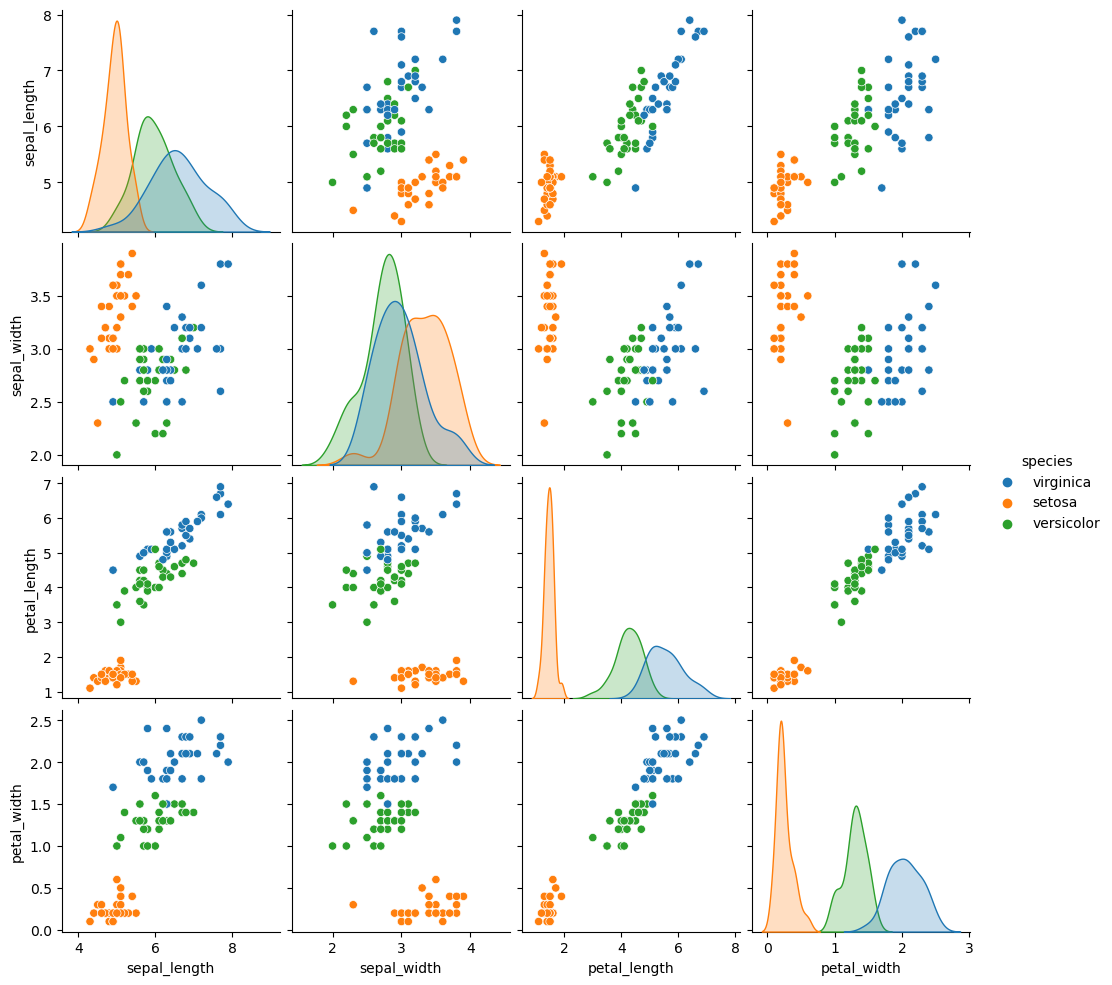

In [114]:
# ne is short for no_encoding. Basically, I'm dropping the encoded parts of train_iris so I can use sns.pairplot
ne_df = train_iris[['species','sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
sns.pairplot(ne_df, hue='species')
plt.show()

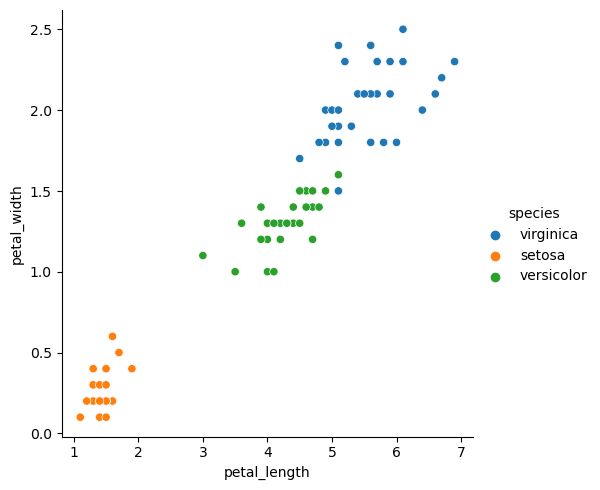

In [115]:
sns.relplot(data=train_iris, x='petal_length', y='petal_width', hue='species')
plt.show()

In [116]:
# For the fourth bullet point of these instruction ("Ask a specific question of the data..."):
# we've already done this above. Quick recap:
# Is there a relationship between petal_length and species?
# H0: There is NO relationship
# Ha: There IS a relationship

# We're comparing a categorical variable (species) with a continuous variable (petal_length), so 
# I used the mannwhitneyu stats test.  Result? p < alpha; therefore we can reject the H0

# For a visualization, see petal_length barplot or boxplot or the 3rd row / 3rd column cell of the pairplot above.



### Summarize multivariate stats takeaways (also Summary of all of Iris exploration):

- all four variables have a relationship with species
- setosa is most clearly separated from the other two species when we compare the variables
- virginica and versicolor have slight overlaps in the variable measurements
- petal_length and petal_width have a more defined relationship than sepal_length and sepal_width
- In modeling phase, use all four variables, but also try just using petal_length and petal_width

# Part III - Telco data



- Explore your telco data to discover drivers of churn
- Determine if certain columns should be dropped
- Determine if it would be valuable to bin some numeric columns
- Determine if it would be valuable to combine multiple columns into one.

What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

In [3]:
df = acq.get_telco_data()
df = prep.prep_telco(df)
train_telco, validate_telco, test_telco = prep.split_function(df, 'churn')

csv file found and read
Prepared df: (7043, 47)

Train: (4225, 47)
Validate: (1409, 47)
Test: (1409, 47)


In [11]:
# ne is short for no_encoding. removing the encoded columns will just make it a little easier to look at
cols = np.array(train_telco.columns[0:20])
cols
ne_train = train_telco[cols]
ne_train.head().T

,2332,5275,6429,89,6412
gender,Male,Male,Male,Female,Female
senior_citizen,0,0,0,1,0
partner,No,No,No,No,No
dependents,No,No,No,No,No
tenure,12,1,59,27,54
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,Yes,Yes,Yes,Yes,Yes
internet_service_type,Fiber optic,DSL,DSL,Fiber optic,Fiber optic
online_security,No,No,No,No,No
online_backup,No,No,No,Yes,Yes


### 1. Hypothesize (plain English)

- Target Variable is churn, i.e. I want to figure out what things affect churn. Priorities are below which shows my current best guess as to what might affect churn the most

- Priority 1: Look at monthly_charges, tenure, contract_type, payment_type, paperliss_billing
- Priority 2: internet_service_type and tech_support (based on previous work on this dataset)
    - 2a: online_security, online_backup, device_protection
- Priority 3: gender, partner, dependents, senior_citizen
- Priority 4: phone_service, multiple lines, streaming_tv, streaming_movies

- I don't plan to look at:
    - total_charges because it is related to tenure

### 2. Visualize

In [13]:
ne_train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_type,monthly_charges,total_charges,churn
2332,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,94.55,1173.55,No
5275,Male,0,No,No,1,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),49.80,49.80,No
6429,Male,0,No,No,59,Yes,Yes,DSL,No,No,Yes,No,No,No,Two year,No,Credit card (automatic),54.15,3116.15,No
89,Female,1,No,No,27,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),86.45,2401.05,No
6412,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,111.10,6014.85,Yes


In [14]:
ne_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 2332 to 6377
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 4225 non-null   object 
 1   senior_citizen         4225 non-null   int64  
 2   partner                4225 non-null   object 
 3   dependents             4225 non-null   object 
 4   tenure                 4225 non-null   int64  
 5   phone_service          4225 non-null   object 
 6   multiple_lines         4225 non-null   object 
 7   internet_service_type  4225 non-null   object 
 8   online_security        4225 non-null   object 
 9   online_backup          4225 non-null   object 
 10  device_protection      4225 non-null   object 
 11  tech_support           4225 non-null   object 
 12  streaming_tv           4225 non-null   object 
 13  streaming_movies       4225 non-null   object 
 14  contract_type          4225 non-null   object 
 15  p

In [15]:
# separate columns by categorical and numeric
col_cats = []
num_cats = []

for col in ne_train.columns:
    if ne_train[col].dtype == 'O':
        col_cats.append(col)
    else:
        if len(ne_train[col].unique()) < 4: # make anything with less than 4 unique values a categorical variable
            col_cats.append(col)
        else:
            num_cats.append(col)
print("col_cats = ")
print(col_cats)
print("num_cats")
print(num_cats)

col_cats = 
['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'internet_service_type', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract_type', 'paperless_billing', 'payment_type', 'churn']
num_cats
['tenure', 'monthly_charges', 'total_charges']


### categorical variables

GENDER
Male      2129
Female    2096
Name: gender, dtype: int64
Male      0.503905
Female    0.496095
Name: gender, dtype: float64


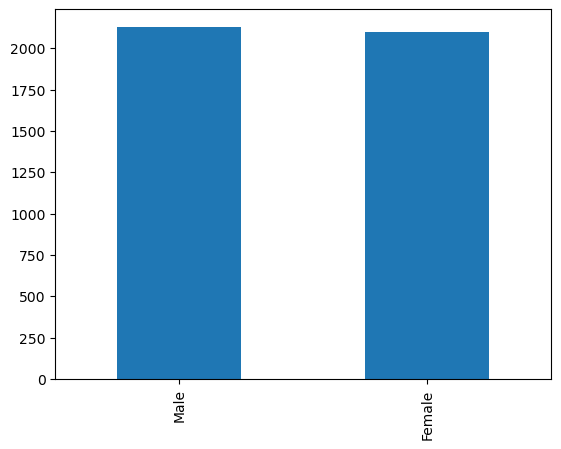


SENIOR_CITIZEN
0    3553
1     672
Name: senior_citizen, dtype: int64
0    0.840947
1    0.159053
Name: senior_citizen, dtype: float64


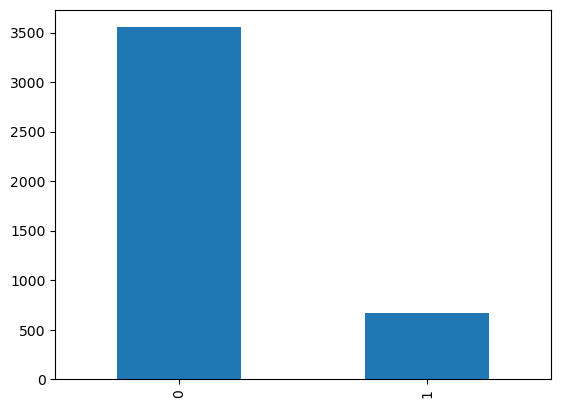


PARTNER
No     2199
Yes    2026
Name: partner, dtype: int64
No     0.520473
Yes    0.479527
Name: partner, dtype: float64


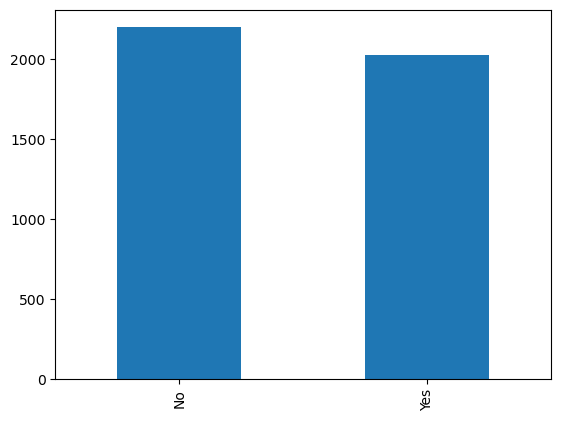


DEPENDENTS
No     2934
Yes    1291
Name: dependents, dtype: int64
No     0.694438
Yes    0.305562
Name: dependents, dtype: float64


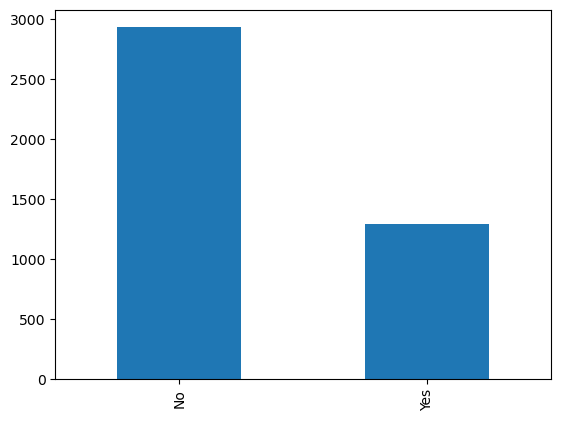


PHONE_SERVICE
Yes    3833
No      392
Name: phone_service, dtype: int64
Yes    0.907219
No     0.092781
Name: phone_service, dtype: float64


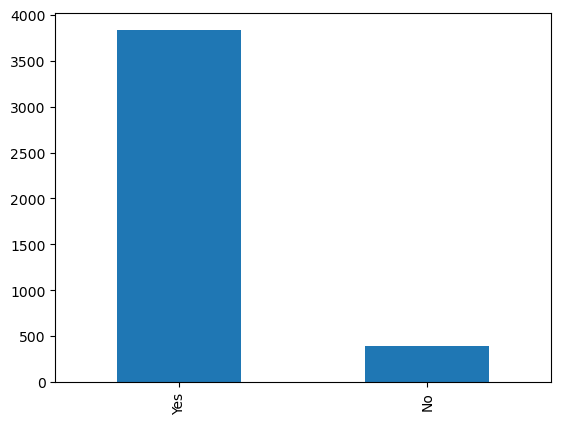


MULTIPLE_LINES
No                  2046
Yes                 1787
No phone service     392
Name: multiple_lines, dtype: int64
No                  0.484260
Yes                 0.422959
No phone service    0.092781
Name: multiple_lines, dtype: float64


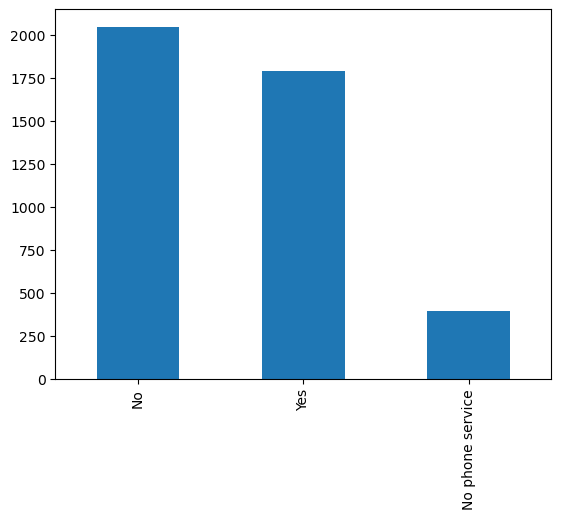


INTERNET_SERVICE_TYPE
Fiber optic    1882
DSL            1437
None            906
Name: internet_service_type, dtype: int64
Fiber optic    0.445444
DSL            0.340118
None           0.214438
Name: internet_service_type, dtype: float64


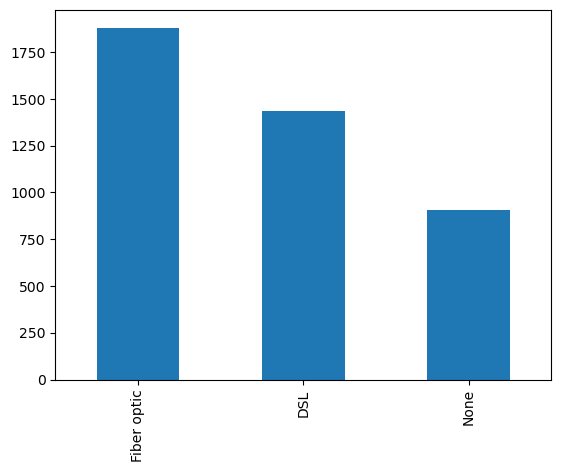


ONLINE_SECURITY
No                     2106
Yes                    1213
No internet service     906
Name: online_security, dtype: int64
No                     0.498462
Yes                    0.287101
No internet service    0.214438
Name: online_security, dtype: float64


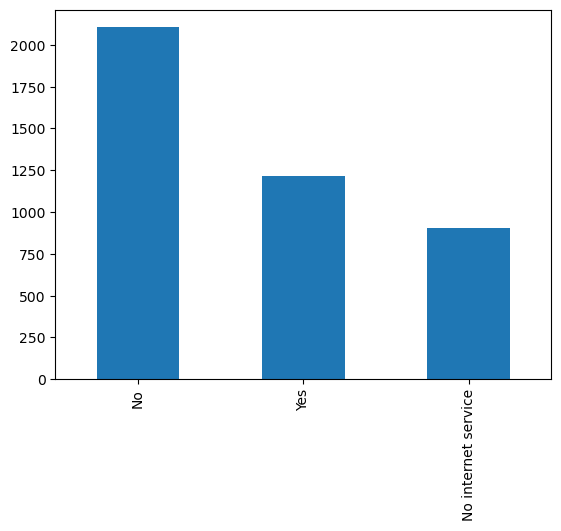


ONLINE_BACKUP
No                     1853
Yes                    1466
No internet service     906
Name: online_backup, dtype: int64
No                     0.438580
Yes                    0.346982
No internet service    0.214438
Name: online_backup, dtype: float64


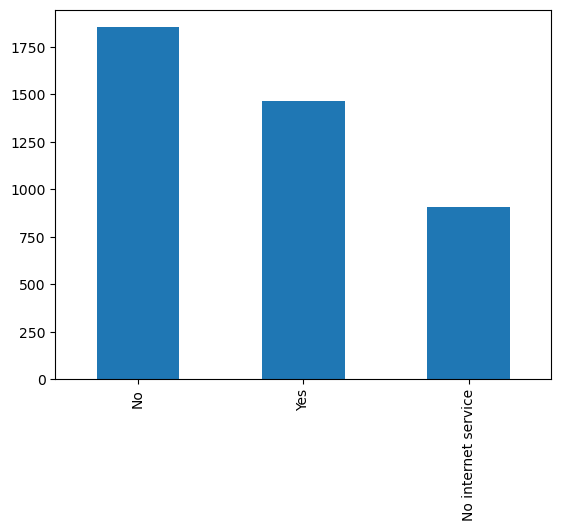


DEVICE_PROTECTION
No                     1860
Yes                    1459
No internet service     906
Name: device_protection, dtype: int64
No                     0.440237
Yes                    0.345325
No internet service    0.214438
Name: device_protection, dtype: float64


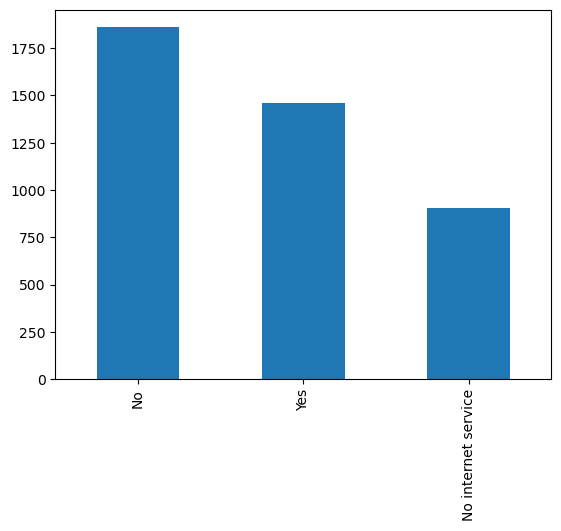


TECH_SUPPORT
No                     2072
Yes                    1247
No internet service     906
Name: tech_support, dtype: int64
No                     0.490414
Yes                    0.295148
No internet service    0.214438
Name: tech_support, dtype: float64


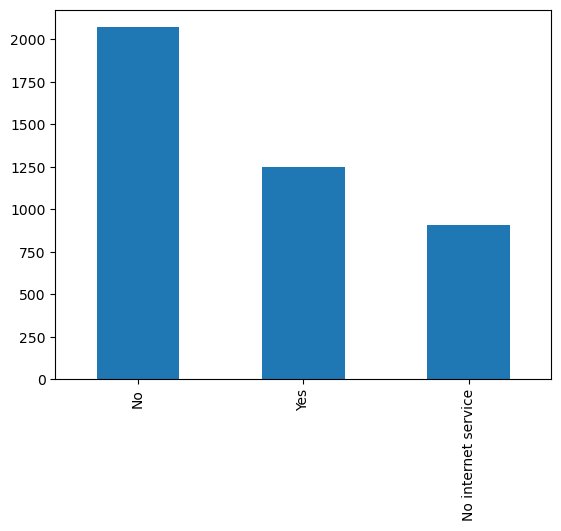


STREAMING_TV
Yes                    1675
No                     1644
No internet service     906
Name: streaming_tv, dtype: int64
Yes                    0.396450
No                     0.389112
No internet service    0.214438
Name: streaming_tv, dtype: float64


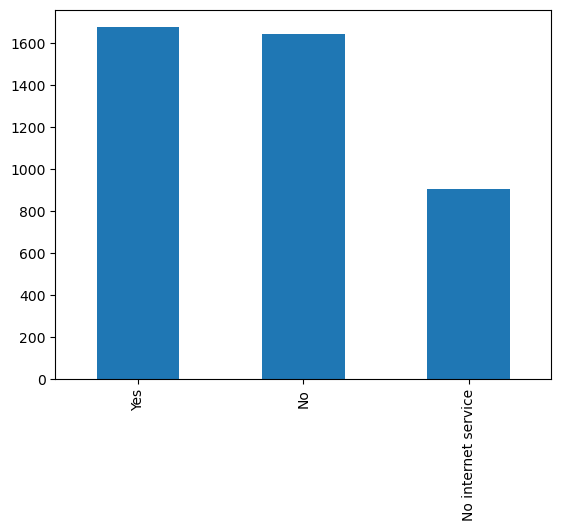


STREAMING_MOVIES
Yes                    1668
No                     1651
No internet service     906
Name: streaming_movies, dtype: int64
Yes                    0.394793
No                     0.390769
No internet service    0.214438
Name: streaming_movies, dtype: float64


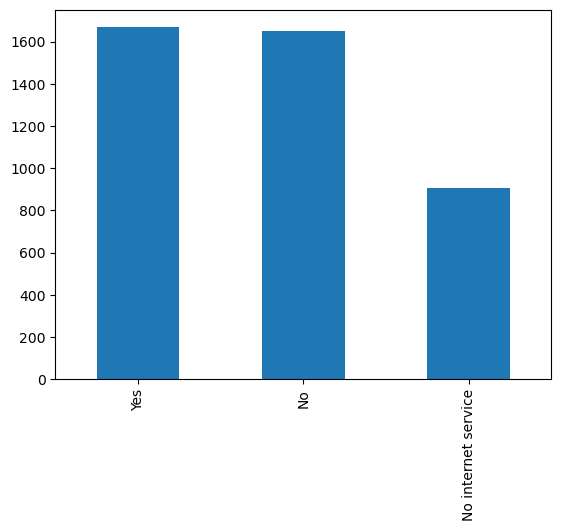


CONTRACT_TYPE
Month-to-month    2318
Two year          1039
One year           868
Name: contract_type, dtype: int64
Month-to-month    0.548639
Two year          0.245917
One year          0.205444
Name: contract_type, dtype: float64


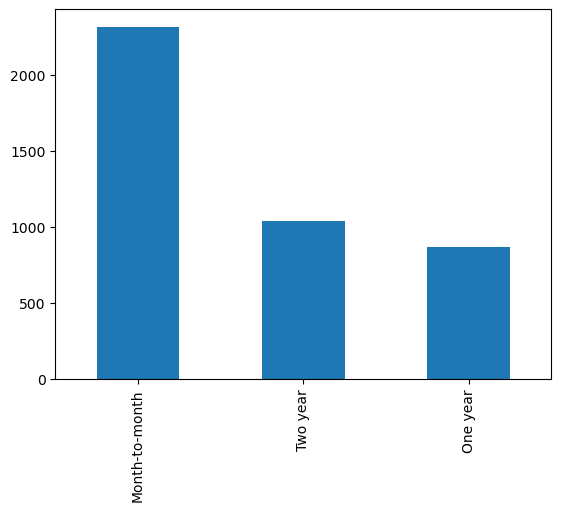


PAPERLESS_BILLING
Yes    2553
No     1672
Name: paperless_billing, dtype: int64
Yes    0.60426
No     0.39574
Name: paperless_billing, dtype: float64


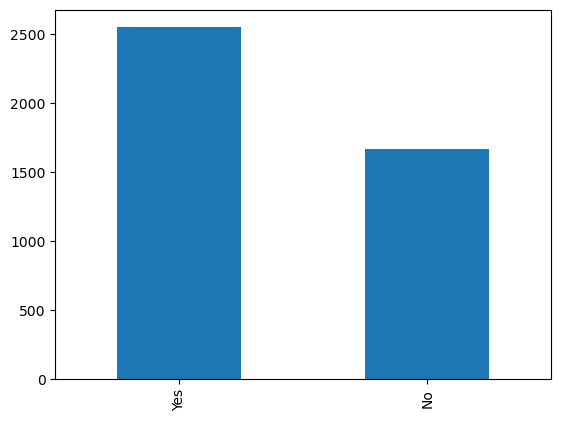


PAYMENT_TYPE
Electronic check             1405
Mailed check                  951
Bank transfer (automatic)     944
Credit card (automatic)       925
Name: payment_type, dtype: int64
Electronic check             0.332544
Mailed check                 0.225089
Bank transfer (automatic)    0.223432
Credit card (automatic)      0.218935
Name: payment_type, dtype: float64


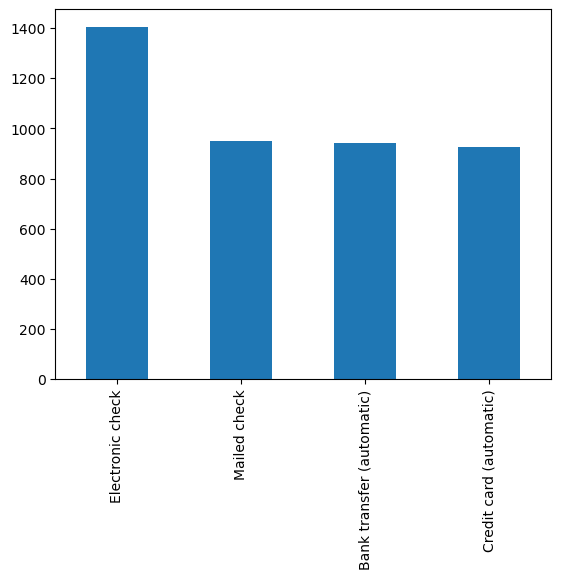


CHURN
No     3104
Yes    1121
Name: churn, dtype: int64
No     0.734675
Yes    0.265325
Name: churn, dtype: float64


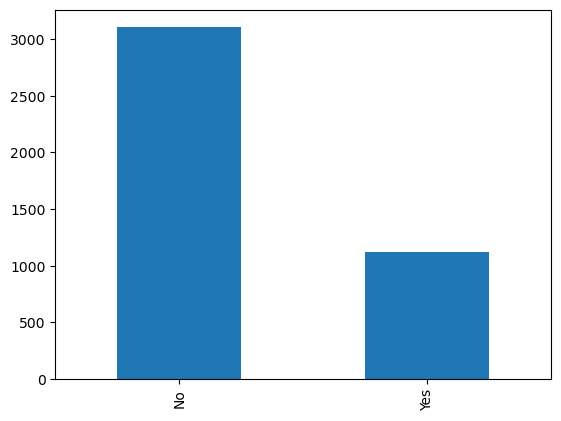

In [18]:
for col in col_cats:
    print (col.upper())
    print (ne_train[col].value_counts())
    print (ne_train[col].value_counts(normalize=True))
    ne_train[col].value_counts().plot.bar()
    plt.show()
    print()

TENURE
1     382
72    226
2     141
3     120
4     107
     ... 
59     34
47     33
36     31
44     25
0       8
Name: tenure, Length: 73, dtype: int64


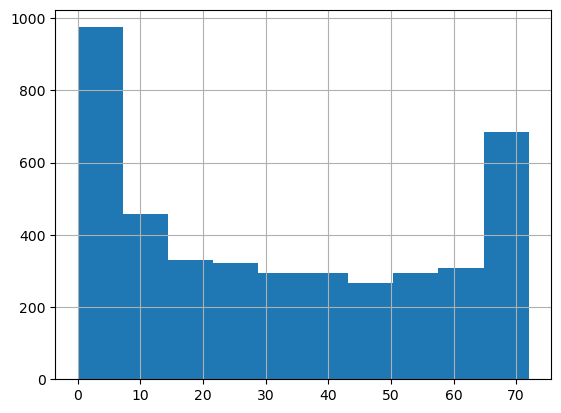


MONTHLY_CHARGES
20.05     35
19.90     30
19.75     30
19.60     28
19.65     27
          ..
71.95      1
57.50      1
51.25      1
113.30     1
39.40      1
Name: monthly_charges, Length: 1369, dtype: int64


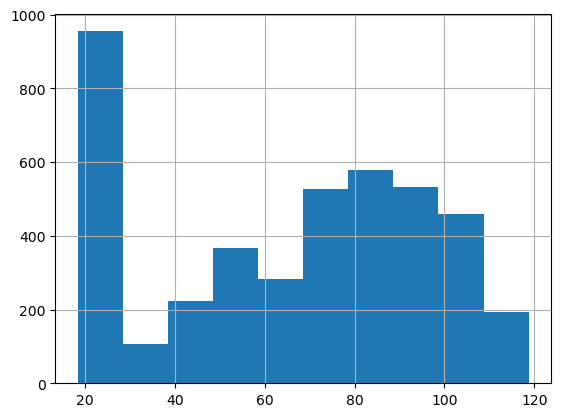


TOTAL_CHARGES
20.20      9
0.00       8
19.75      7
20.05      7
19.55      6
          ..
1943.20    1
5125.75    1
309.40     1
6330.40    1
5680.90    1
Name: total_charges, Length: 3998, dtype: int64


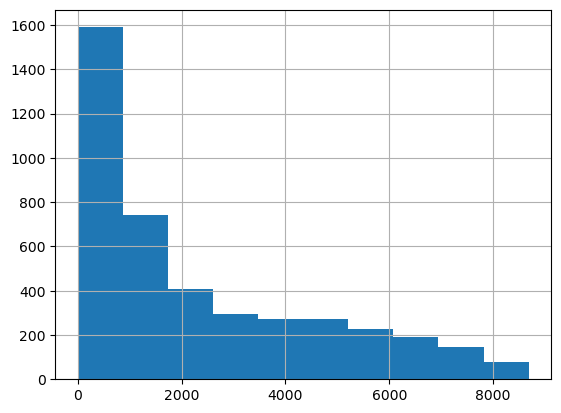

In [21]:
for col in num_cats:
    print(col.upper())
    print(ne_train[col].value_counts())
    ne_train[col].hist()
    plt.show()
    print()

### Takeaways:

- Continuous variables: tenure and monthly charges; neither are normally distributed.
    - For tenure, there are many people with low tenure (<= ~ 7 months) and a good number with high tenure (> ~65 mo), but the majority are in the middle between about 10 and 65 months which is almost uniformly distributed.
- For the categorical variables:
    - gender is evenly distributed (males slightly outnumber females)
    - only 16% of the dataset are senior citizens
    - partner, dependendents are multiple lines are sorta, kinda related. 
        - yes_partner = 48%, yes_dependents = 30%, yes_multiple_lines = 42%
    - multiple_lines is the highest priority of these ot investigate because 
        1) it includes phone_service yes/no, so I can eliminate that variable
        2) it's kind of in the middle of partner and dependents. (They may all be worth looking at if I have time.)
    - internet_service_type of None (~21%) means those customers also will be None for: online_security, online_backup, tech_support, device_protection, streaming_tv, and streaming_movies
    - streaming_tv and streaming_movies are almost the same; probably the same people, so we can eliminate one
    - online_backup and device_protection are also very similar; possibly same people, consider eliminating one
    - online_security and tech_support are similar proportions, too.
    
New Priorities:
- Priority 1: Look at monthly_charges, tenure, contract_type, payment_type, paperliss_billing
- Priority 2: internet_service_type and tech_support (based on previous work on this dataset)
    - 2a: online_security, online_backup, device_protection
- Priority 3: gender, partner, dependents
- Priority 4:  multiple lines, senior_citizen, streaming_tv

- I don't plan to look at:
    - total_charges because it is related to tenure
    - phone_service because it is contained in multiple lines  
    - streaming_movies because it is so similar to streaming_tv


In [22]:
ne_train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_type,monthly_charges,total_charges,churn
2332,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,94.55,1173.55,No
5275,Male,0,No,No,1,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),49.80,49.80,No
6429,Male,0,No,No,59,Yes,Yes,DSL,No,No,Yes,No,No,No,Two year,No,Credit card (automatic),54.15,3116.15,No
89,Female,1,No,No,27,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),86.45,2401.05,No
6412,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,111.10,6014.85,Yes


### Analyze 

Hypothesize / Visualize / Analyze with stats / Summarize

Q: Does monthly_charges affect churn?

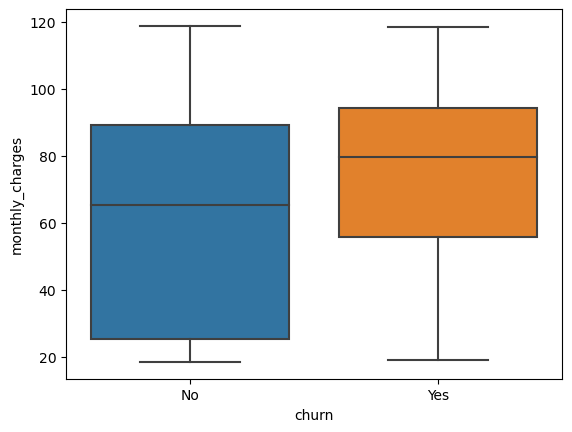

In [30]:
sns.boxplot(data=ne_train, x='churn', y='monthly_charges')
plt.show()

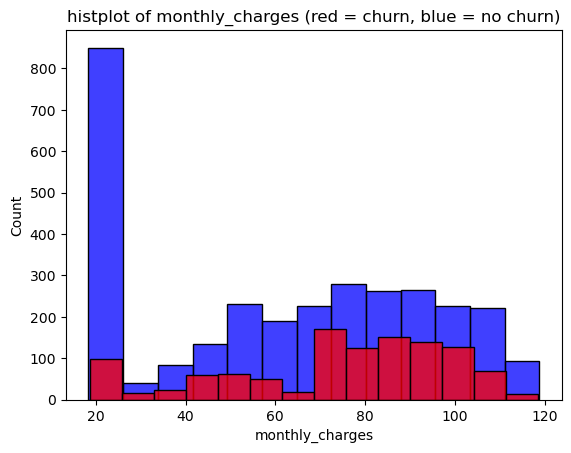

In [37]:
sns.histplot(ne_train[ne_train.churn == 'No'].monthly_charges, color='blue')
sns.histplot(ne_train[ne_train.churn == 'Yes'].monthly_charges, color='red')
plt.title('histplot of monthly_charges (red = churn, blue = no churn)')
plt.show()

### Analyze with statistics
- $H_0$ There is NO relationship between churn and monthly charges
- $H_a$ There IS a relationship
- $\alpha$ = .05
categorical vs continuous variables not normally distributed => mannwhitneyu test

In [39]:
no_churn_train = train_telco[train_telco.churn == 'No'].monthly_charges
yes_churn_train = train_telco[train_telco.churn == 'Yes'].monthly_charges
t, p = stats.mannwhitneyu(no_churn_train, yes_churn_train)
t, p

(1351248.0, 1.261599899747347e-28)

### Summarize monthly_charges vs churn

- p is < .05, so we can reject the null hypothesis which suggests the $H_a$

- In summary, lower monthly charges decreases the likelihood of churn.

### Analyze 

Hypothesize / Visualize / Analyze with stats / Summarize

Q: Does tenure affect churn?

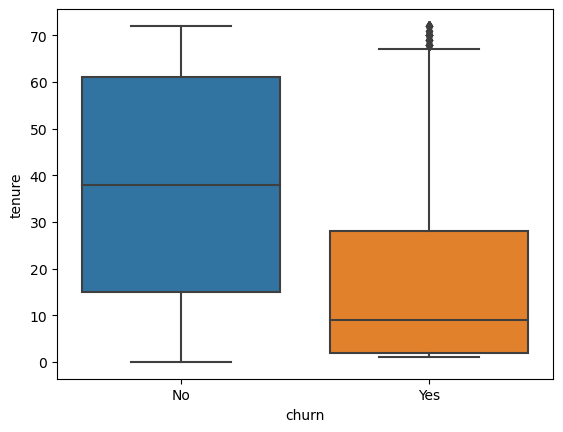

In [40]:
sns.boxplot(data=ne_train, x='churn', y='tenure')
plt.show()

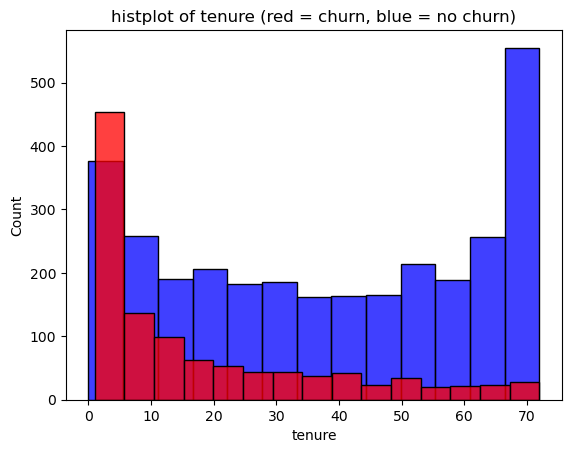

In [41]:
sns.histplot(ne_train[ne_train.churn == 'No'].tenure, color='blue')
sns.histplot(ne_train[ne_train.churn == 'Yes'].tenure, color='red')
plt.title('histplot of tenure (red = churn, blue = no churn)')
plt.show()

### Analyze with statistics
- $H_0$ There is NO relationship between churn and tenure
- $H_a$ There IS a relationship
- $\alpha$ = .05
categorical vs continuous variables not normally distributed => mannwhitneyu test

In [42]:
no_churn_train = train_telco[train_telco.churn == 'No'].tenure
yes_churn_train = train_telco[train_telco.churn == 'Yes'].tenure
t, p = stats.mannwhitneyu(no_churn_train, yes_churn_train)
t, p

(2590959.0, 9.793028571741095e-131)

### Summarize monthly_charges vs churn

- p is < .05, so we can reject the null hypothesis which suggests the $H_a$

- In summary, higher tenure decreases the likelihood of churn.

### Analyze 

Hypothesize / Visualize / Analyze with stats / Summarize

Q: Does contract_type affect churn?

In [46]:
# train_telco.head().T

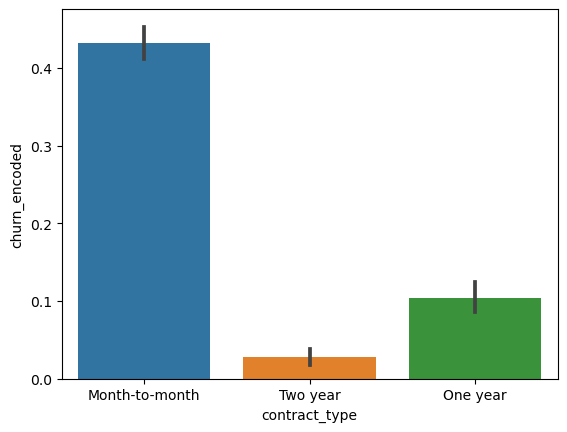

In [45]:
# Had to use the regular train_telco dataframe because I needed a numeric for churn (aka churn_encoded)
sns.barplot(data=train_telco, x='contract_type', y='churn_encoded')
plt.show()

### Analyze with statistics
- $H_0$ There is NO relationship between churn and tenure
- $H_a$ There IS a relationship
- $\alpha$ = .05
categorical vs categorical variables => chi^2 test

In [47]:
observed = pd.crosstab(train_telco.contract_type, train_telco.churn_encoded)
observed

churn_encoded,0,1
contract_type,,
Month-to-month,1316,1002
One year,778,90
Two year,1010,29


In [49]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(748.2006336217892,
 3.3907574978861363e-163,
 2,
 array([[1702.9756213 ,  615.0243787 ],
        [ 637.69751479,  230.30248521],
        [ 763.32686391,  275.67313609]]))